Original Data (first 10 rows):
      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466
5  47.658630
6  65.792128
7  57.674347
8  45.305256
9  55.425600

Original Data Description:
           Values
count  106.000000
mean    49.492014
std     17.070082
min    -20.000000
25%     43.657335
50%     48.730437
75%     55.091291
max    150.000000

--- Outliers identified by Z-score (threshold > 3) ---
     Values   Z_Score  Is_Outlier_ZScore
103   105.0  3.267218               True
104   150.0  5.915933               True
105   -20.0 -4.090323               True

Q1: 43.66, Q3: 55.09, IQR: 11.43
IQR Lower Bound: 26.51, IQR Upper Bound: 72.24

--- Outliers identified by IQR method ---
         Values   Z_Score  Is_Outlier_ZScore  Is_Outlier_IQR
74    23.802549 -1.512090              False            True
100   10.000000 -2.324513              False            True
101   15.000000 -2.030211              False            True
102   90.000000  2.384313              False    

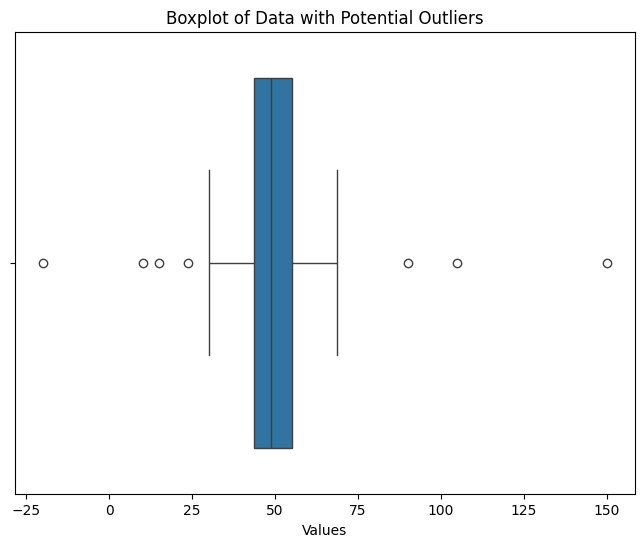


--- Comparison of Outliers ---

Outliers identified by BOTH Z-score and IQR:
     Values   Z_Score  Is_Outlier_ZScore  Is_Outlier_IQR
103   105.0  3.267218               True            True
104   150.0  5.915933               True            True
105   -20.0 -4.090323               True            True

Outliers identified by Z-score ONLY:
Empty DataFrame
Columns: [Values, Z_Score, Is_Outlier_ZScore, Is_Outlier_IQR]
Index: []

Outliers identified by IQR ONLY:
        Values   Z_Score  Is_Outlier_ZScore  Is_Outlier_IQR
74   23.802549 -1.512090              False            True
100  10.000000 -2.324513              False            True
101  15.000000 -2.030211              False            True
102  90.000000  2.384313              False            True


In [1]:
# Question: Combining Multiple Outlier Detection Methods
# Description: Combine Z-score, IQR, and Boxplot methods to detect and compare outliers in adataset.

# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create a sample dataset with potential outliers ---
# Let's create a dataset with a single feature and introduce some values
# that should be identified as outliers by these methods.
np.random.seed(42) # Setting a seed for reproducibility of the random data
# Generate some data from a normal distribution
data = np.random.normal(loc=50, scale=10, size=100) # Mean=50, Std Dev=10

# Introduce some artificial outliers
outliers = np.array([10, 15, 90, 105, 150, -20]) # Added one more outlier
data = np.concatenate([data, outliers]) # Add outliers to the generated data

df = pd.DataFrame({'Values': data})

print("Original Data (first 10 rows):")
print(df.head(10))
print("\nOriginal Data Description:")
# Display summary statistics for the original data
print(df.describe())

# --- Method 1: Z-score Method ---

# Calculate the Z-score for each data point
# zscore() computes the Z-score relative to the mean and standard deviation of the array.
df['Z_Score'] = zscore(df['Values'])

# Define a Z-score threshold (e.g., 3 is a common threshold)
# Data points with an absolute Z-score greater than this threshold are considered outliers.
z_score_threshold = 3

# Identify outliers based on the Z-score threshold
# Create a boolean column indicating whether a point is an outlier by Z-score.
df['Is_Outlier_ZScore'] = np.abs(df['Z_Score']) > z_score_threshold

print(f"\n--- Outliers identified by Z-score (threshold > {z_score_threshold}) ---")
# Filter the DataFrame to show only the rows identified as outliers by Z-score.
zscore_outliers = df[df['Is_Outlier_ZScore']]
print(zscore_outliers)

# --- Method 2: IQR Method ---

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the data
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection using the 1.5 * IQR rule
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

print(f"\nQ1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"IQR Lower Bound: {lower_bound_iqr:.2f}, IQR Upper Bound: {upper_bound_iqr:.2f}")

# Identify outliers based on the IQR method
# Create a boolean column indicating whether a point is an outlier by IQR.
# A point is an outlier if it's below the lower bound OR above the upper bound.
df['Is_Outlier_IQR'] = (df['Values'] < lower_bound_iqr) | (df['Values'] > upper_bound_iqr)

print("\n--- Outliers identified by IQR method ---")
# Filter the DataFrame to show only the rows identified as outliers by IQR.
iqr_outliers = df[df['Is_Outlier_IQR']]
print(iqr_outliers)

# --- Method 3: Boxplot Visualization ---

# Create a boxplot to visually identify outliers
# Boxplots inherently use the IQR rule (1.5 * IQR) to define whiskers and outliers.
plt.figure(figsize=(8, 6)) # Set the figure size
sns.boxplot(x=df['Values']) # Create a boxplot of the 'Values' column
plt.title('Boxplot of Data with Potential Outliers')
plt.xlabel('Values')
plt.show() # Display the boxplot

# --- Comparing Outliers Identified by Z-score and IQR ---

print("\n--- Comparison of Outliers ---")
# Find data points identified as outliers by BOTH methods
both_methods_outliers = df[df['Is_Outlier_ZScore'] & df['Is_Outlier_IQR']]
print("\nOutliers identified by BOTH Z-score and IQR:")
print(both_methods_outliers)

# Find data points identified by Z-score but NOT by IQR
zscore_only_outliers = df[df['Is_Outlier_ZScore'] & ~df['Is_Outlier_IQR']]
print("\nOutliers identified by Z-score ONLY:")
print(zscore_only_outliers)

# Find data points identified by IQR but NOT by Z-score
iqr_only_outliers = df[~df['Is_Outlier_ZScore'] & df['Is_Outlier_IQR']]
print("\nOutliers identified by IQR ONLY:")
print(iqr_only_outliers)

# --- Interpretation ---
# Observe the output and the boxplot.
# The points flagged by both methods are likely the most extreme outliers.
# Points flagged by only one method might be less extreme or the methods
# are behaving differently due to the data distribution (e.g., Z-score is
# more affected by extreme values if the data is not perfectly normal).
# The boxplot visually confirms the outliers identified by the IQR method.

